<a href="https://colab.research.google.com/github/anaguilarar/ghg_emissions/blob/main/ghg_emissions_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Greenhouse gas (GHG) emissions for agriculture: Examples

The GHG measurement, produced by agricultural activities such as fertilizers, irrigation, tillage, among others, is important for quantifying the impact that this sector has on climate change. For that reason, several methodologies have been proposed to address a baseline measurement using data from farmers. The main purpose of this repository is to offer a tool able to gauge GHG emissions estimation for multiple commercial cropping events. It is important to mention that this work is based on the Mitigation Option Tool for Agriculture project([CCAFS - MOT](https://ccafs.cgiar.org/research/projects/mitigation-options-tool-agriculture-ccafs-mot)) developed by CCAFS and The Aberdeen University. 

Clonning the repository

Following examples are made for gauging GHG emissions from farmer productive events. The first one shows how many CO<sub>2</sub> eq.ha<sup>-1</sup> was produced from fields planted with maize.
First step is to clone the repository

In [9]:
!git clone https://github.com/anaguilarar/ghg_emissions.git

Cloning into 'ghg_emissions'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 69 (delta 11), reused 63 (delta 5), pack-reused 0
Unpacking objects: 100% (69/69), done.


In [12]:
!pip install rasterio

     |████████████████████████████████| 19.1MB 48.4MB/s 


We are going to relocate the current work directory to ghg_emissions folder

In [10]:
import os 
os.chdir("ghg_emissions")

Now we can run our first example. This data has information from multiple crop events.

In [18]:
from scripts import crop_ghg_emissions as ghg
from scripts import plot_functions
ghg_data = ghg.ghg_emissions('data/inputs_mot_example.xlsx', ## file path to the general information 
                             'data/fertiliser_inputs_mot_example.xlsx', ## file path to the fertilizers information   
                             id_event= 'event_7') ## you can ppoint out an specif crop event, or for run through the all events don't put this paremeter


calculating emissions for event_7


Once we use our ghg_emissions function, we can what were the emissions (CO<sub>2</sub> eq.ha<sup>-1</sup>) regarding Burning residues, Land use change, Soil mining, Soil management, and Fertilisers.

In [14]:
ghg_data.emissions_summary

,id_event,municipality,Fertiliser production,Fertlises induced field emissions,Soil Management,Soil Mining,Land Use Change effect on soil,Burning residues,Methane from rice
0,event_7,cartagena,0.0,77.7,-1638.12,786.200471,2019.6,0,707.623378


In the case that we are interested on claculating emisisons for multiple points, we don't point out any id event

In [16]:
ghg_data = ghg.ghg_emissions('data/inputs_mot_example.xlsx', ## file path to the general information 
                             'data/fertiliser_inputs_mot_example.xlsx')

ghg_data.emissions_summary

calculating emissions for event_0
calculating emissions for event_1
calculating emissions for event_2
calculating emissions for event_3
calculating emissions for event_4
calculating emissions for event_5
calculating emissions for event_6
calculating emissions for event_7


,id_event,municipality,Fertiliser production,Fertlises induced field emissions,Soil Management,Soil Mining,Land Use Change effect on soil,Burning residues,Methane from rice
0,event_0,cundinamarca,584.37,604.47,-7920.00,0.000000,20790.000000,876.359608,NaN
0,event_1,santander,206.00,174.52,-374.66,809.750588,1801.800000,0.000000,NaN
0,event_2,nariño,484.04,149.09,-2431.00,0.000000,0.000000,0.000000,NaN
0,event_3,córdoba,650.93,772.42,-4895.60,1805.334588,0.000000,666.949453,NaN
0,event_4,mmm,1384.00,2152.84,0.00,0.000000,2019.600000,73.510650,NaN
0,event_5,reykiavik,248.00,537.45,-1414.29,0.000000,1918.292683,0.000000,NaN
0,event_6,pasto,252.44,126.19,-7227.00,686.263529,6237.000000,1134.429870,38453.949262
0,event_7,cartagena,0.00,77.70,-1638.12,786.200471,2019.600000,0.000000,707.623378


###Visualization

For an easy visualization, we included a bar plot graphic

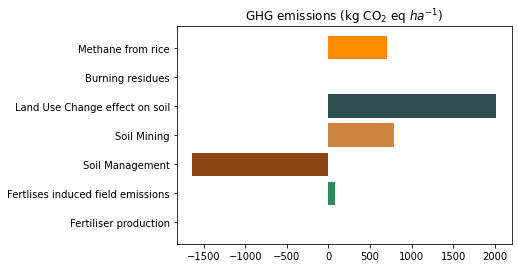

In [19]:
plot_functions.bar_plot_emissions(
    ghg_data.emissions_summary, #  table summary obtained from previous step
    'mean')# function to aggregated all crop events

A final plot was also included aimed at showing the emissions for specific localities

In [20]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def f(municipality):
    subset = datatest.loc[datatest['municipality'] == municipality]
    plot_functions.bar_plot_emissions(subset, 'mean')
    
datatest = ghg_data.emissions_summary.copy()
interact(f, municipality=datatest.municipality.unique())

interactive(children=(Dropdown(description='municipality', options=('cartagena',), value='cartagena'), Output(…

<function __main__.f>